<a href="https://colab.research.google.com/github/kuku0809/project-updates/blob/patch-1/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install gdown
!pip install tensorflow-text==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.2 MB/s eta 0:00:00


In [3]:
!pip install wordcloud

In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF" ]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [6]:
!gdown --id 1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r --output 515k-hotel-reviews-data-in-europe.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r
From (redirected): https://drive.google.com/uc?id=1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r&confirm=t&uuid=e8d47165-9860-4ea0-afdb-2a0320c3a46c
To: /content/515k-hotel-reviews-data-in-europe.zip
100% 47.3M/47.3M [00:01<00:00, 27.9MB/s]


In [7]:
!unzip -q 515k-hotel-reviews-data-in-europe.zip


In [8]:
!ls


515k-hotel-reviews-data-in-europe.zip  Hotel_Reviews.csv  sample_data


In [9]:
!head Hotel_Reviews.csv

Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194,8/3/2017,7.7,Hotel Arena, Russia , I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that cont

In [10]:
df = pd.read_csv("Hotel_Reviews.csv", parse_dates=['Review_Date'])
df.shape

(515738, 17)

In [11]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [12]:
df['review'] = df['Negative_Review'] + df['Positive_Review']

In [13]:
df.review.head()


0     I am so angry that i made this post available...
1    No Negative No real complaints the hotel was g...
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: review, dtype: object

In [14]:
df["review_type"] = df["Reviewer_Score"].apply(
  lambda x: "bad" if x < 7 else "good"
)

<Axes: xlabel='count', ylabel='review_type'>

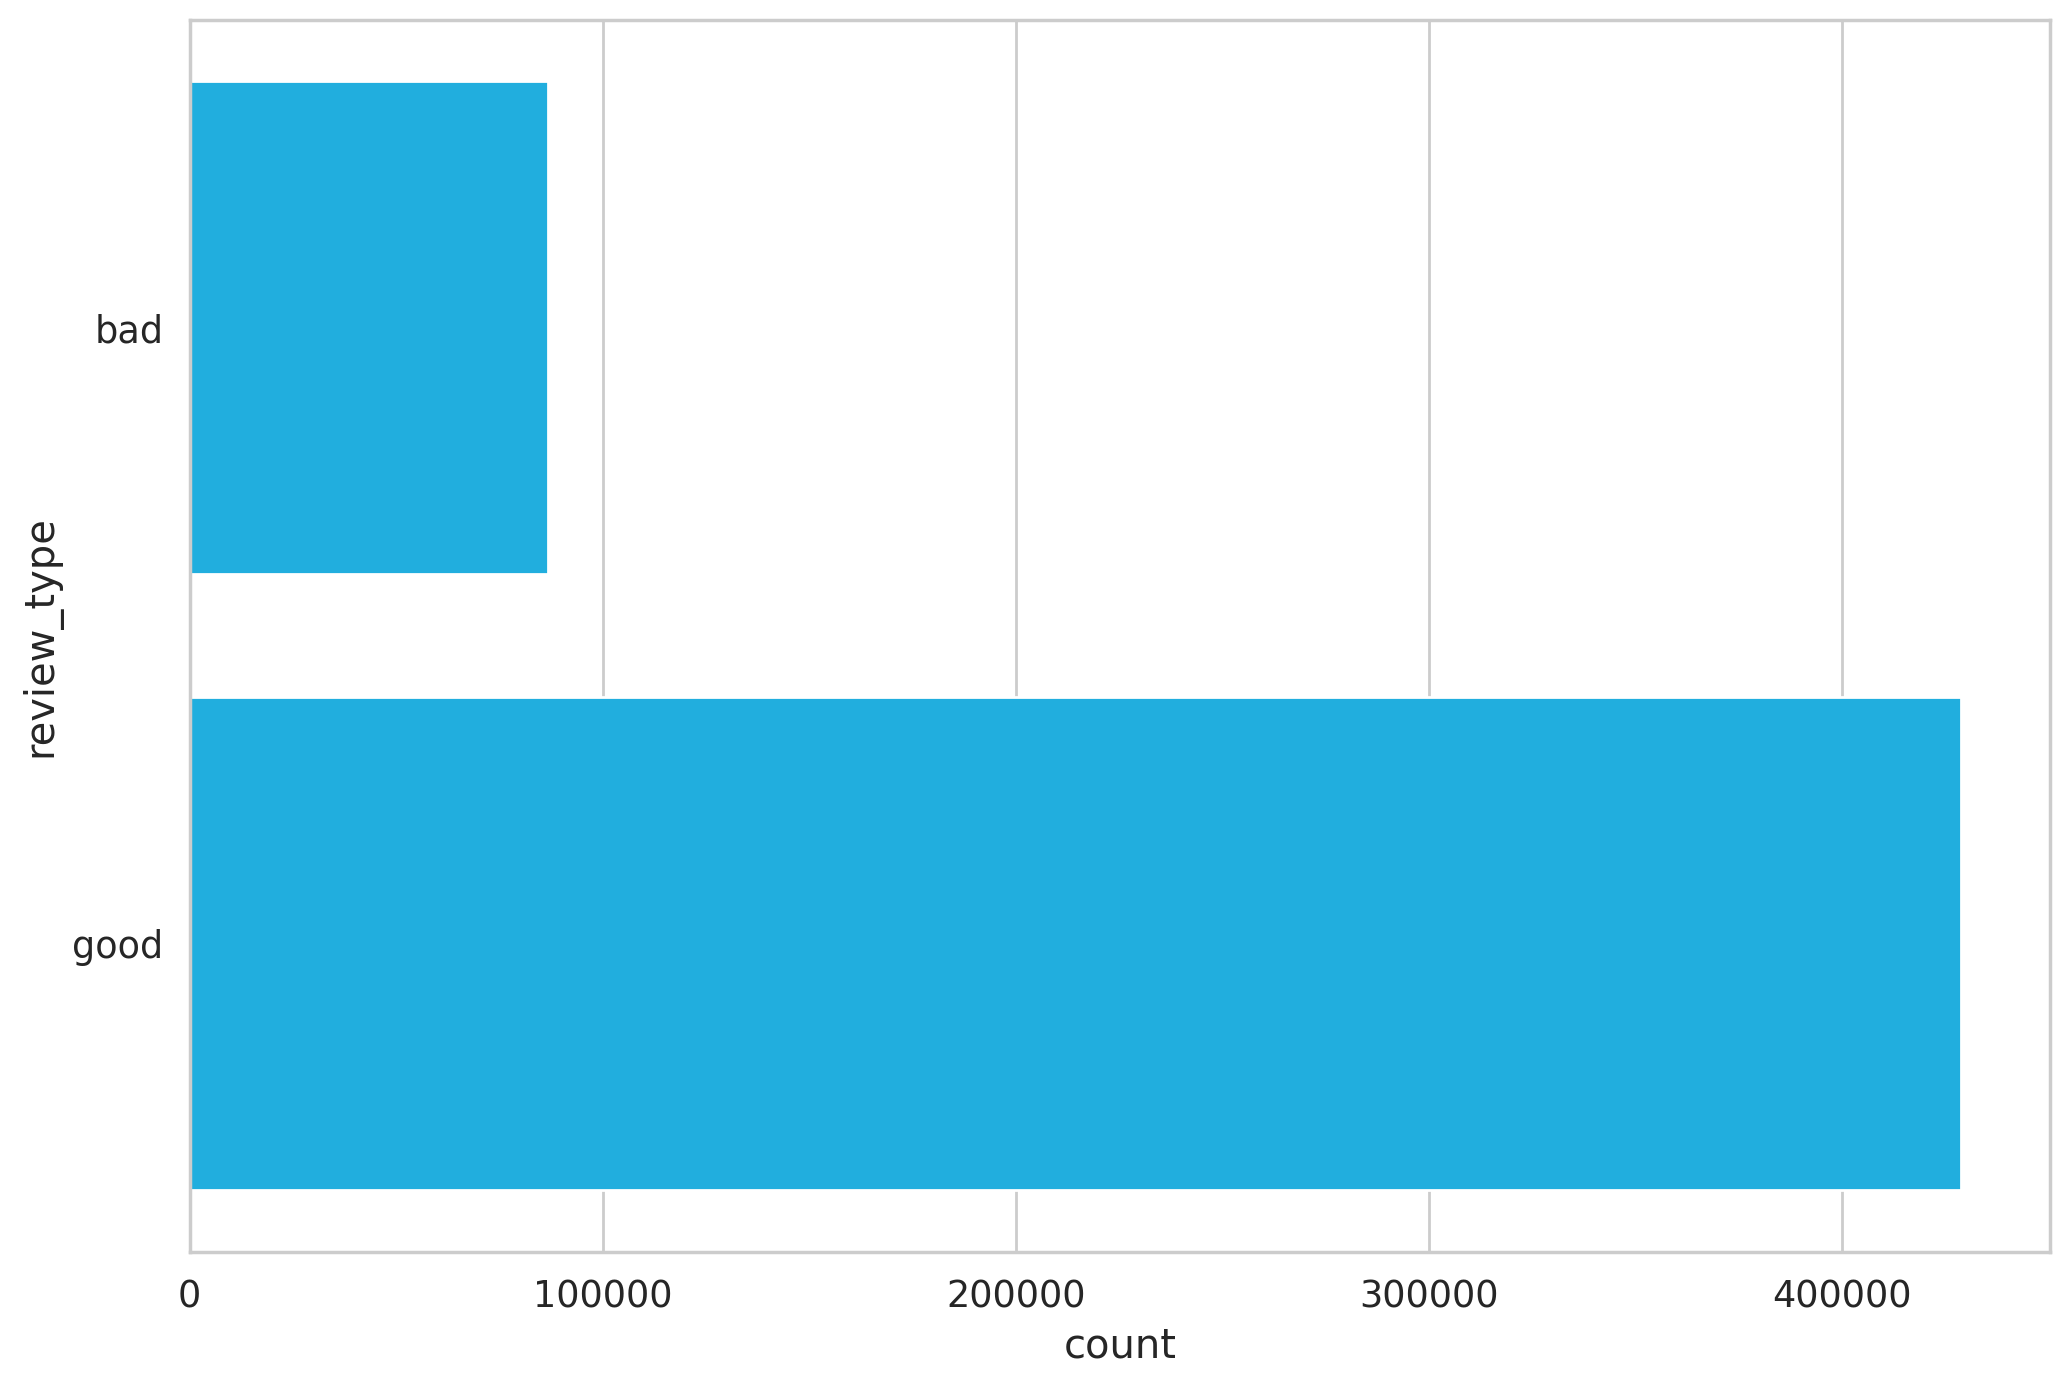

In [15]:
sns.countplot(df.review_type)

In [16]:
good_reviews=df[df.review_type=='good']
bad_reviews=df[df.review_type=='bad']

In [17]:
good_reviews_text=" ".join(good_reviews.review.to_numpy().tolist())
bad_reviews_text=" ".join(bad_reviews.review.to_numpy().tolist())

In [18]:
good_reviews_cloud=WordCloud(stopwords=STOPWORDS,background_color ="white").generate(good_reviews_text)
bad_reviews_cloud=WordCloud(stopwords=STOPWORDS,background_color ="white").generate(bad_reviews_text)

In [19]:
def show_word_cloud(cloud):
  plt.figure(figsize=(16,10))
  plt.imshow(cloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

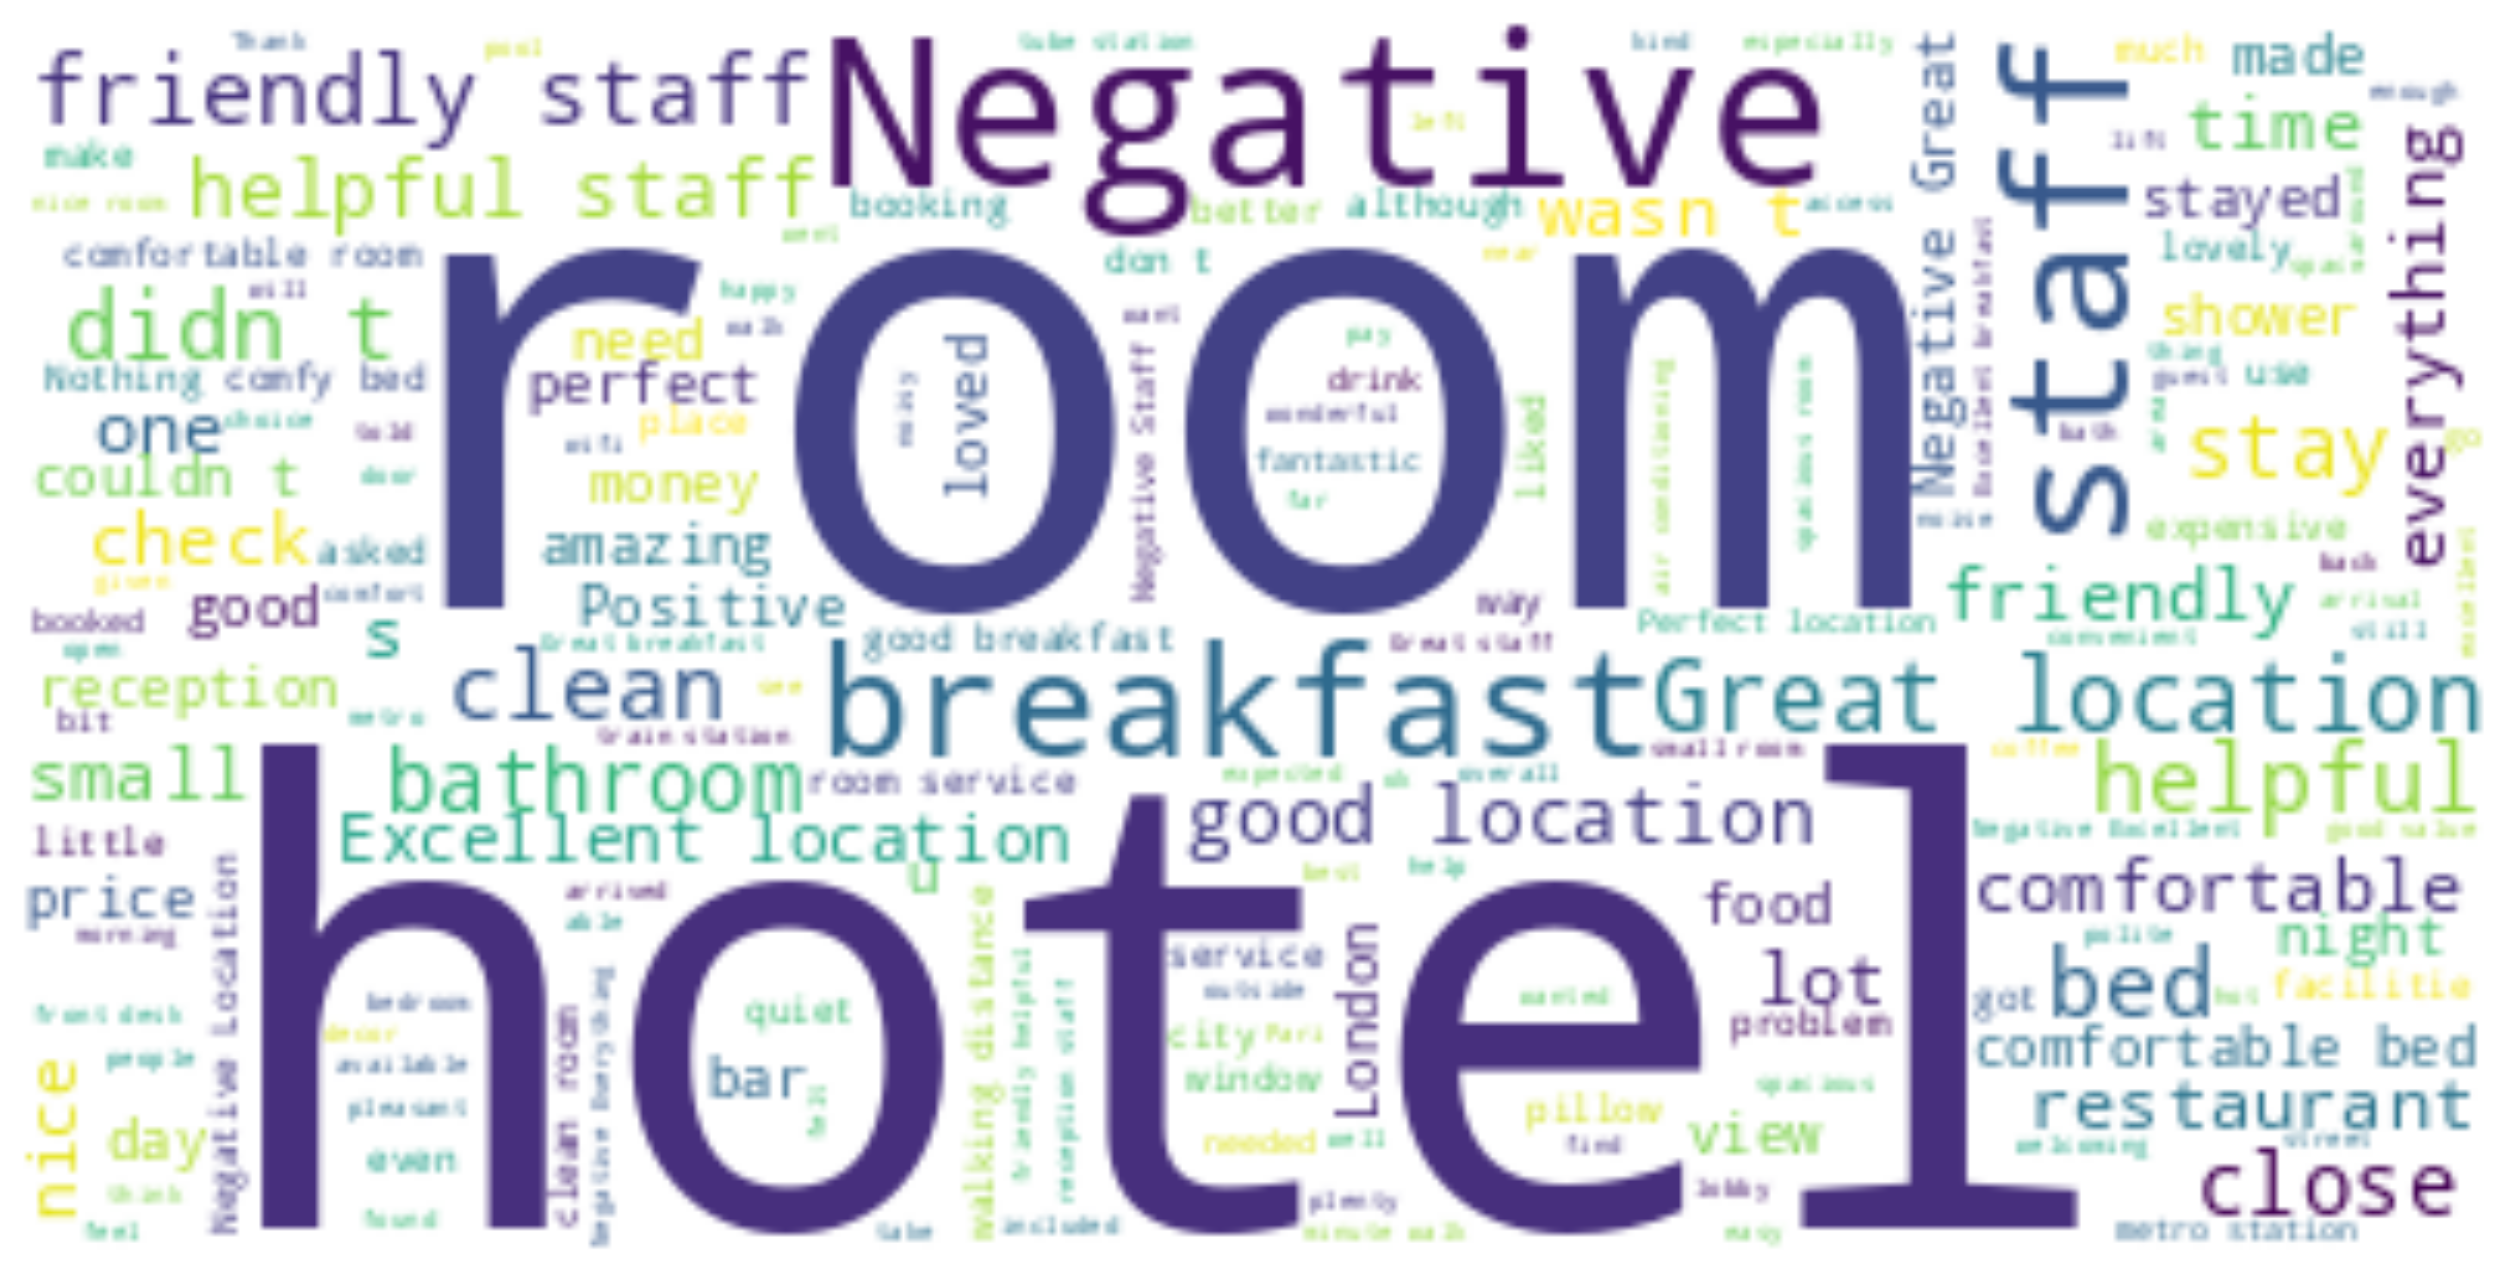

In [20]:
show_word_cloud(good_reviews_cloud)

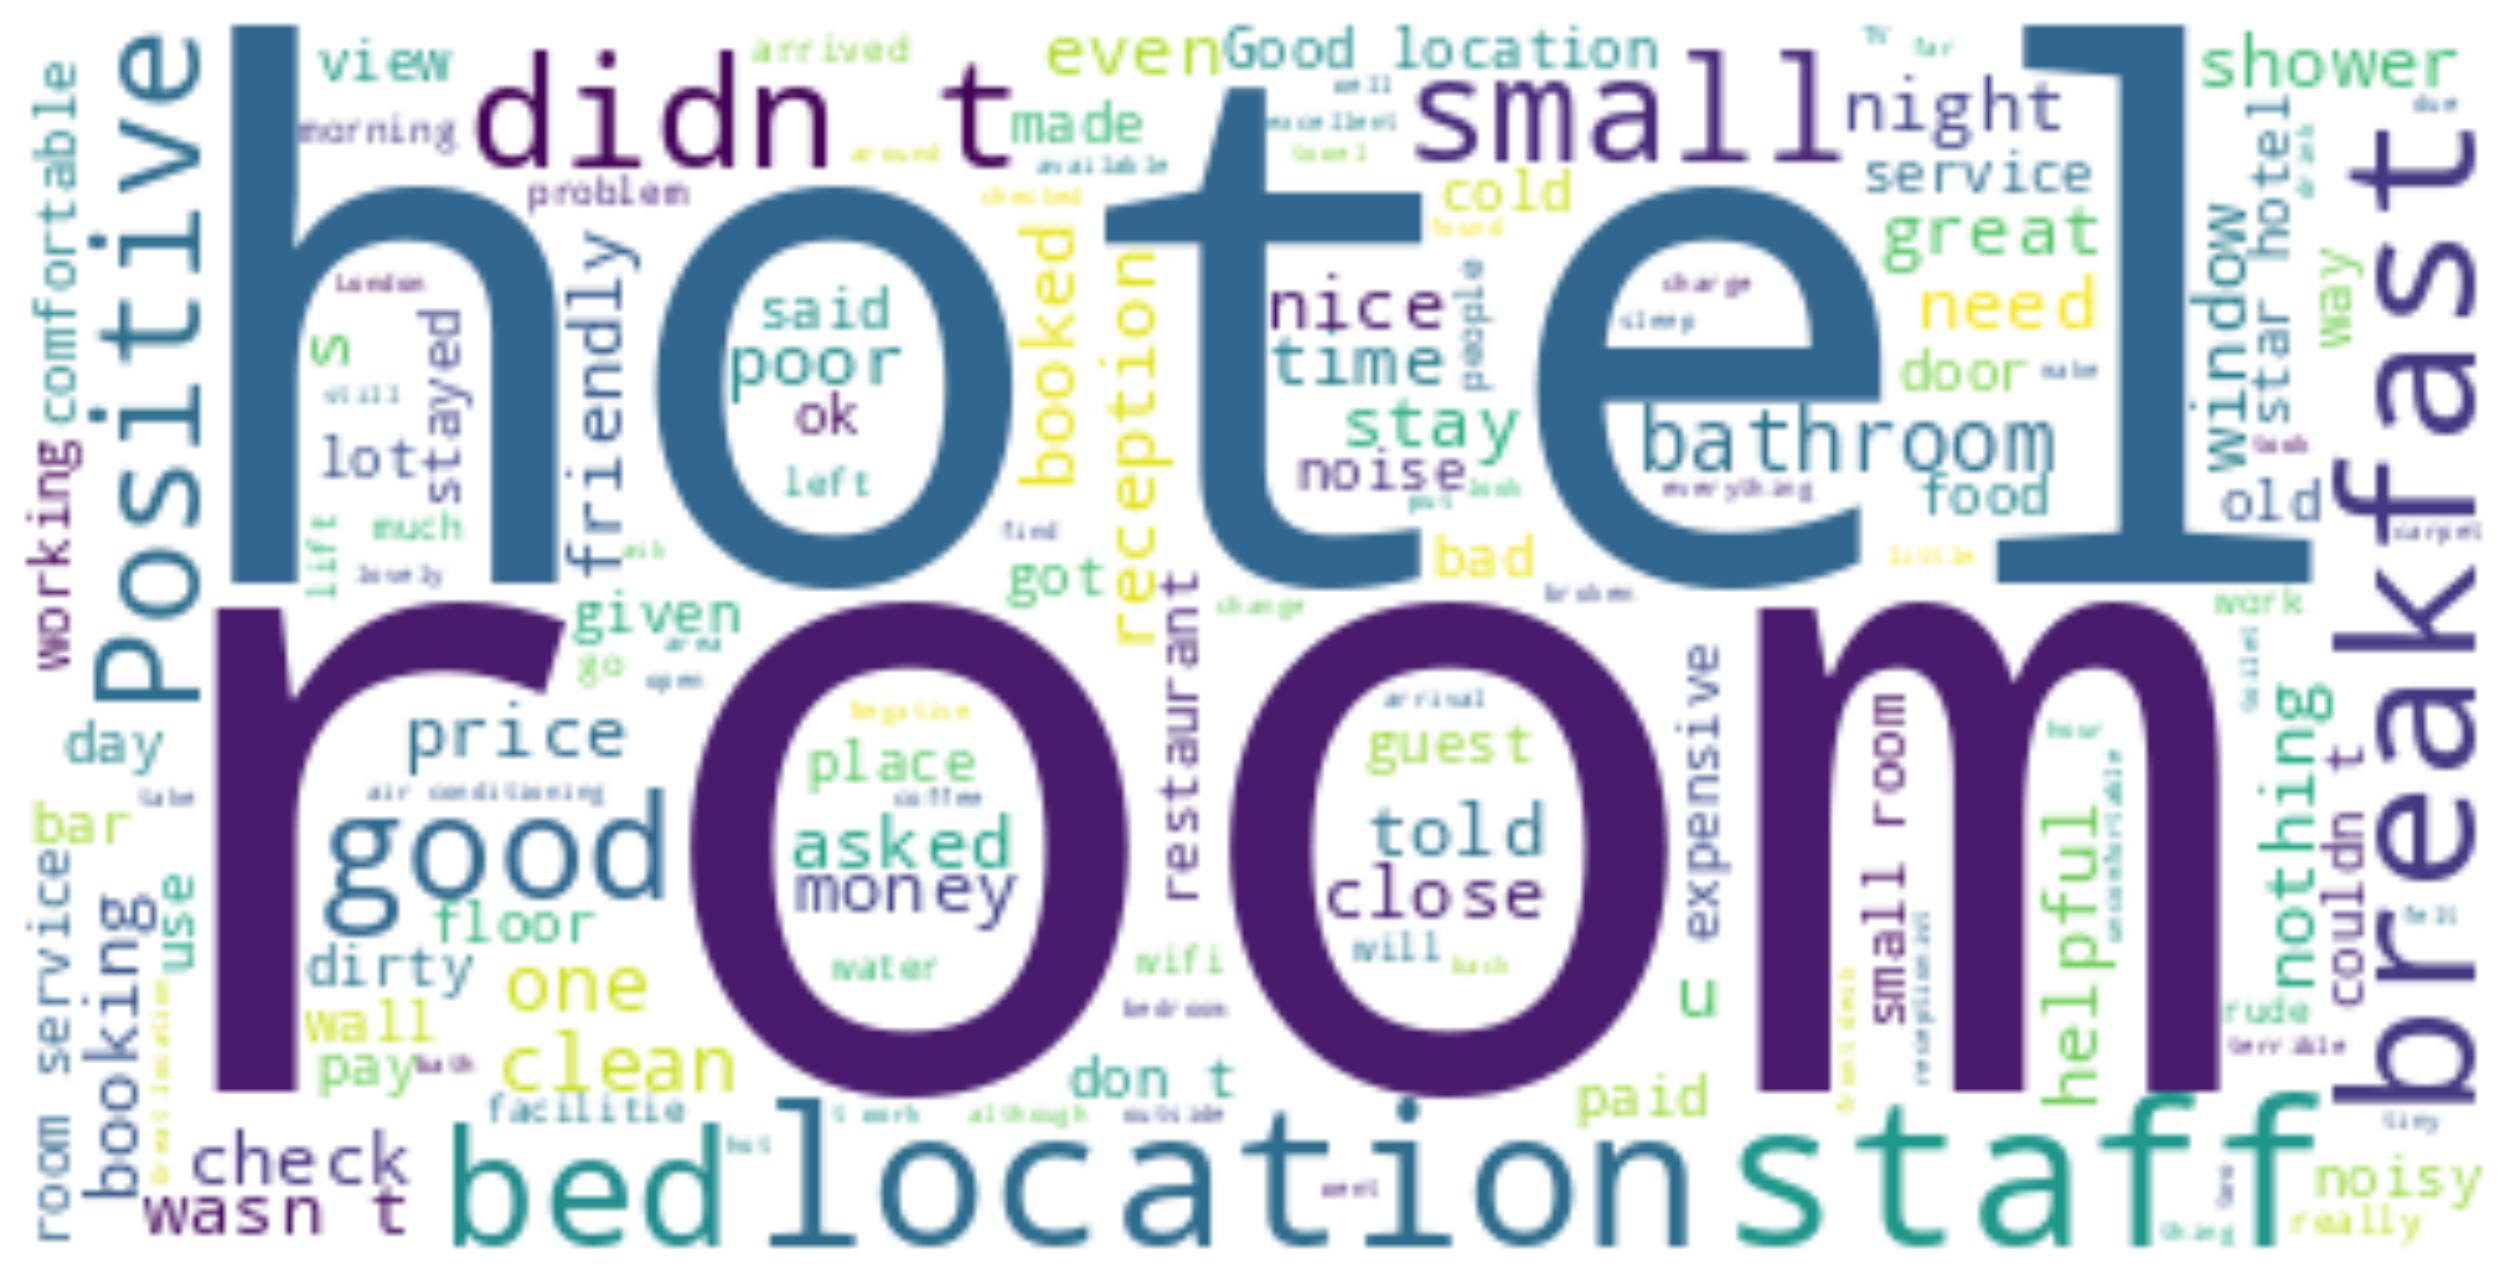

In [21]:
show_word_cloud(bad_reviews_cloud)

In [22]:
good_df = good_reviews.sample(n=len(bad_reviews), random_state=RANDOM_SEED)
bad_df = bad_reviews
print(good_df.shape,bad_df.shape)

(86851, 19) (86851, 19)


In [23]:
review_df = good_df._append(bad_df).reset_index(drop=True)


In [24]:
review_df=review_df[["review","review_type"]]

In [25]:
review_df.head()

review review_type
0   Nothing not to like  Location was excellent r...        good
1   Replenishment of supplies in room toiletries ...        good
2                              No Negative The views        good
3   Could do with biscuits and a complimentary wa...        good
4   Bar prices expensive and mini bar very expens...        good

<Axes: xlabel='count', ylabel='review_type'>

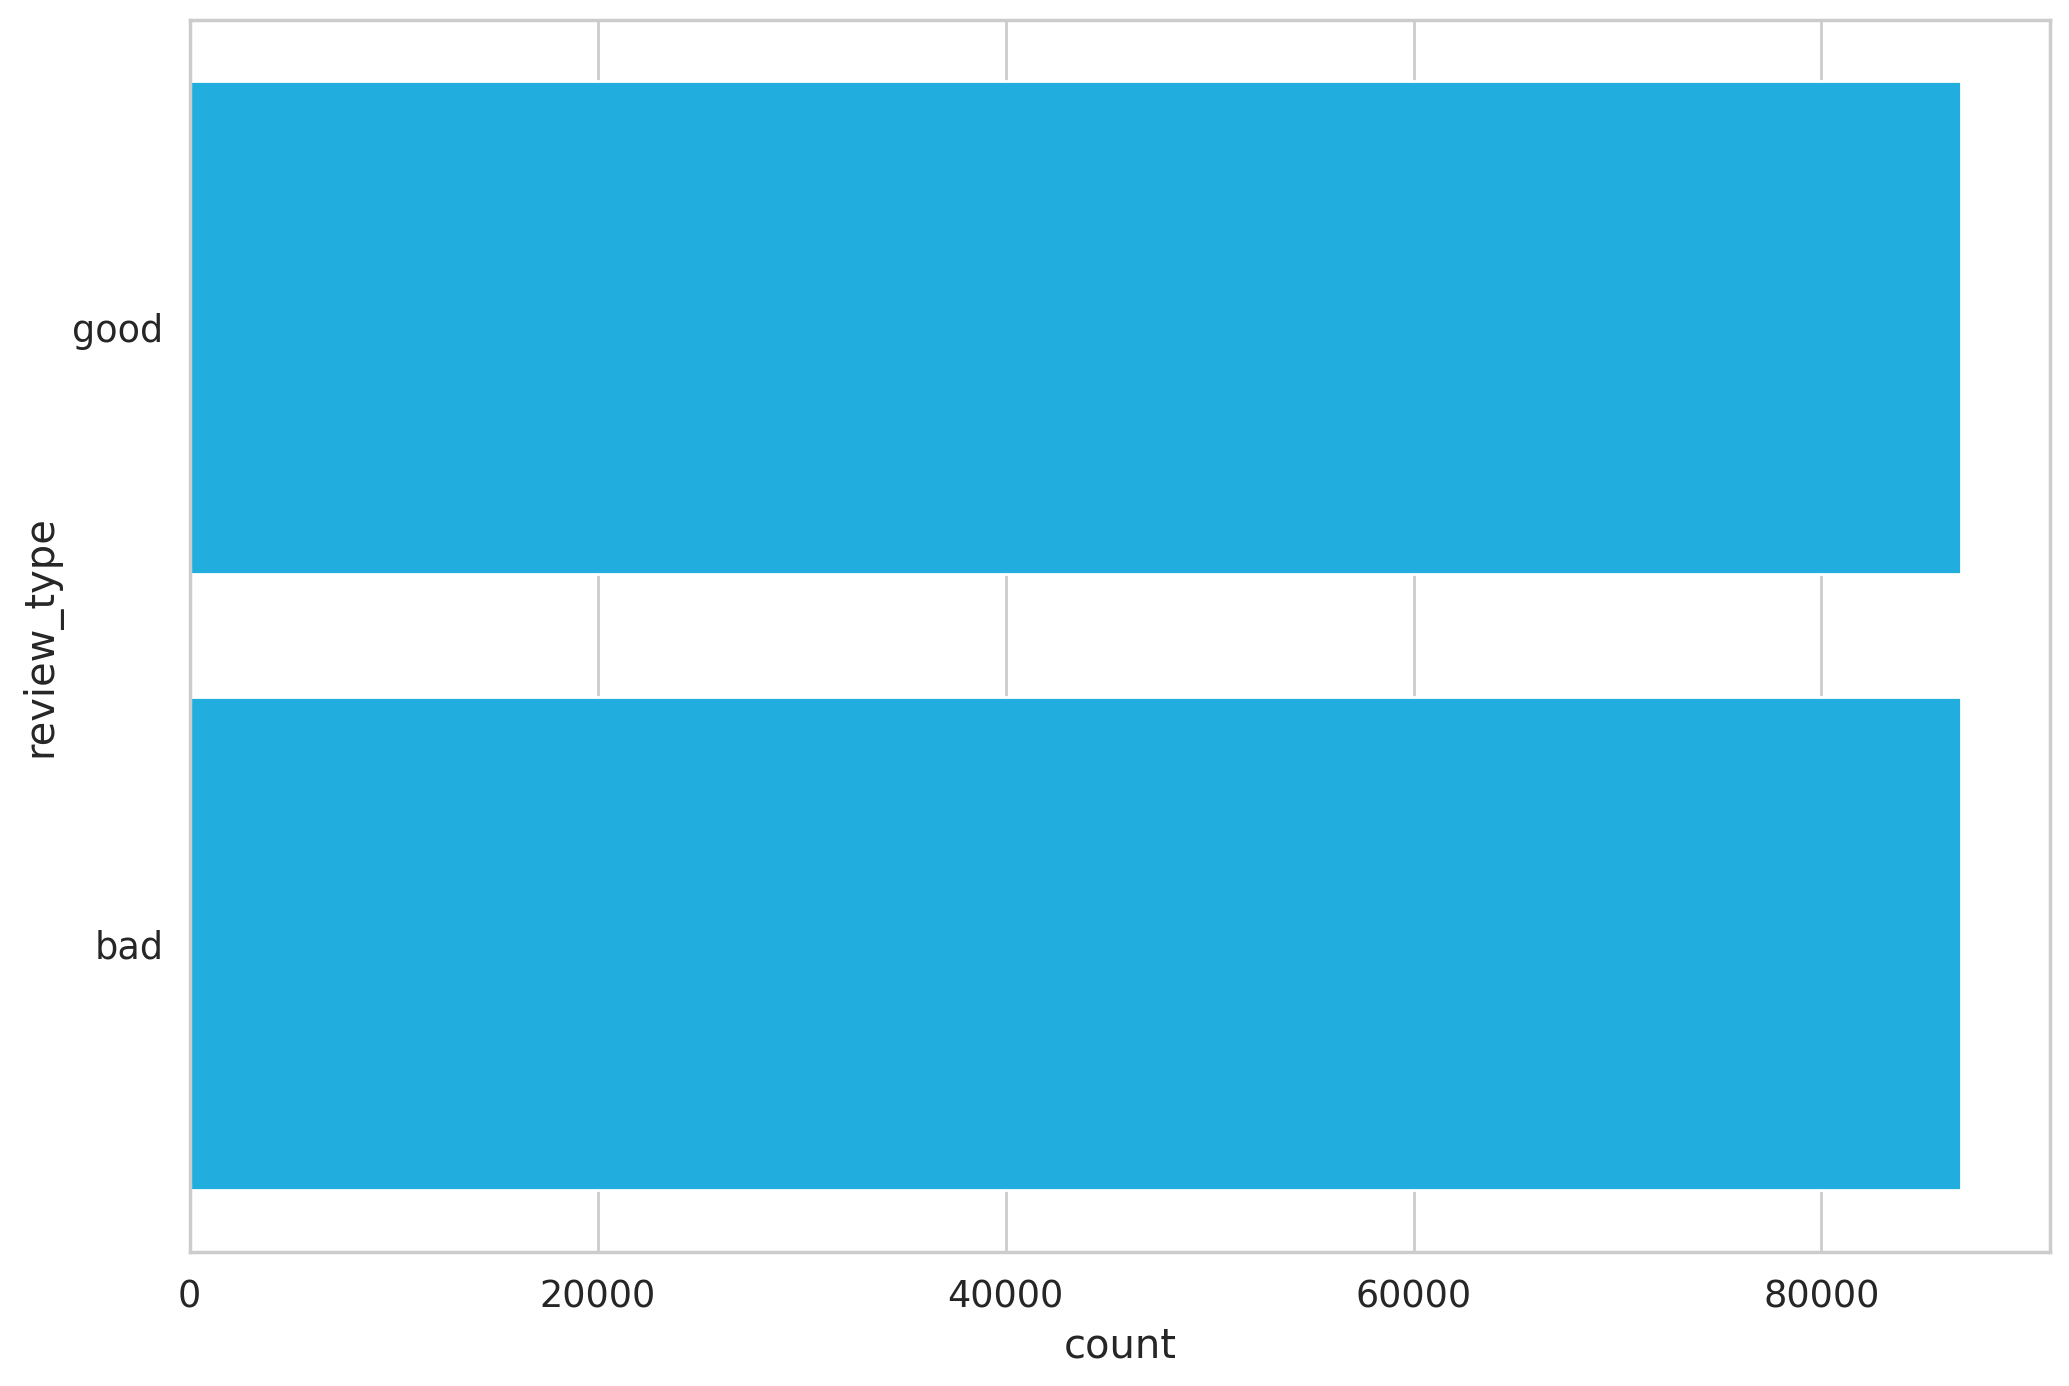

In [26]:
sns.countplot(review_df.review_type)

In [27]:
#universal sentance encoder- sentences to embedded vecs


In [28]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [29]:
sent_1=['the location is great']
sent_2=['amazing location']

In [30]:
emb_1=use(sent_1)
emb_2=use(sent_2)

In [31]:
emb_1.shape

TensorShape([1, 512])

In [32]:
np.inner(emb_1,emb_2).flatten()[0] #closer the num to 1 the closer they r in meaning

0.7925468

In [33]:
#Preprocessing

In [34]:
from sklearn.preprocessing import OneHotEncoder
type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.review_type.to_numpy().reshape(-1, 1)
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.review,
    type_one_hot,
    test_size=.1,
    random_state=RANDOM_SEED
  )

In [36]:
X_train = []
for r in tqdm(train_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)
X_train = np.array(X_train)

100%|██████████| 156331/156331 [4:08:03<00:00, 10.50it/s]


In [37]:
X_test = []
for r in tqdm(test_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)
X_test = np.array(X_test)

100%|██████████| 17371/17371 [25:52<00:00, 11.19it/s]


In [38]:
model = keras.Sequential()
model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)
model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)
model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=True
)

Epoch 1/10
8794/8794 [==============================] - 51s 5ms/step - loss: 0.4341 - accuracy: 0.7973 - val_loss: 0.4022 - val_accuracy: 0.8118
Epoch 2/10
8794/8794 [==============================] - 47s 5ms/step - loss: 0.4125 - accuracy: 0.8102 - val_loss: 0.3938 - val_accuracy: 0.8165
Epoch 3/10
8794/8794 [==============================] - 45s 5ms/step - loss: 0.4049 - accuracy: 0.8154 - val_loss: 0.3890 - val_accuracy: 0.8176
Epoch 4/10
8794/8794 [==============================] - 46s 5ms/step - loss: 0.3971 - accuracy: 0.8191 - val_loss: 0.3862 - val_accuracy: 0.8213
Epoch 5/10
8794/8794 [==============================] - 46s 5ms/step - loss: 0.3920 - accuracy: 0.8232 - val_loss: 0.3923 - val_accuracy: 0.8190
Epoch 6/10
8794/8794 [==============================] - 48s 5ms/step - loss: 0.3868 - accuracy: 0.8253 - val_loss: 0.3851 - val_accuracy: 0.8204
Epoch 7/10
8794/8794 [==============================] - 48s 5ms/step - loss: 0.3813 - accuracy: 0.8284 - val_loss: 0.3838 - val_ac

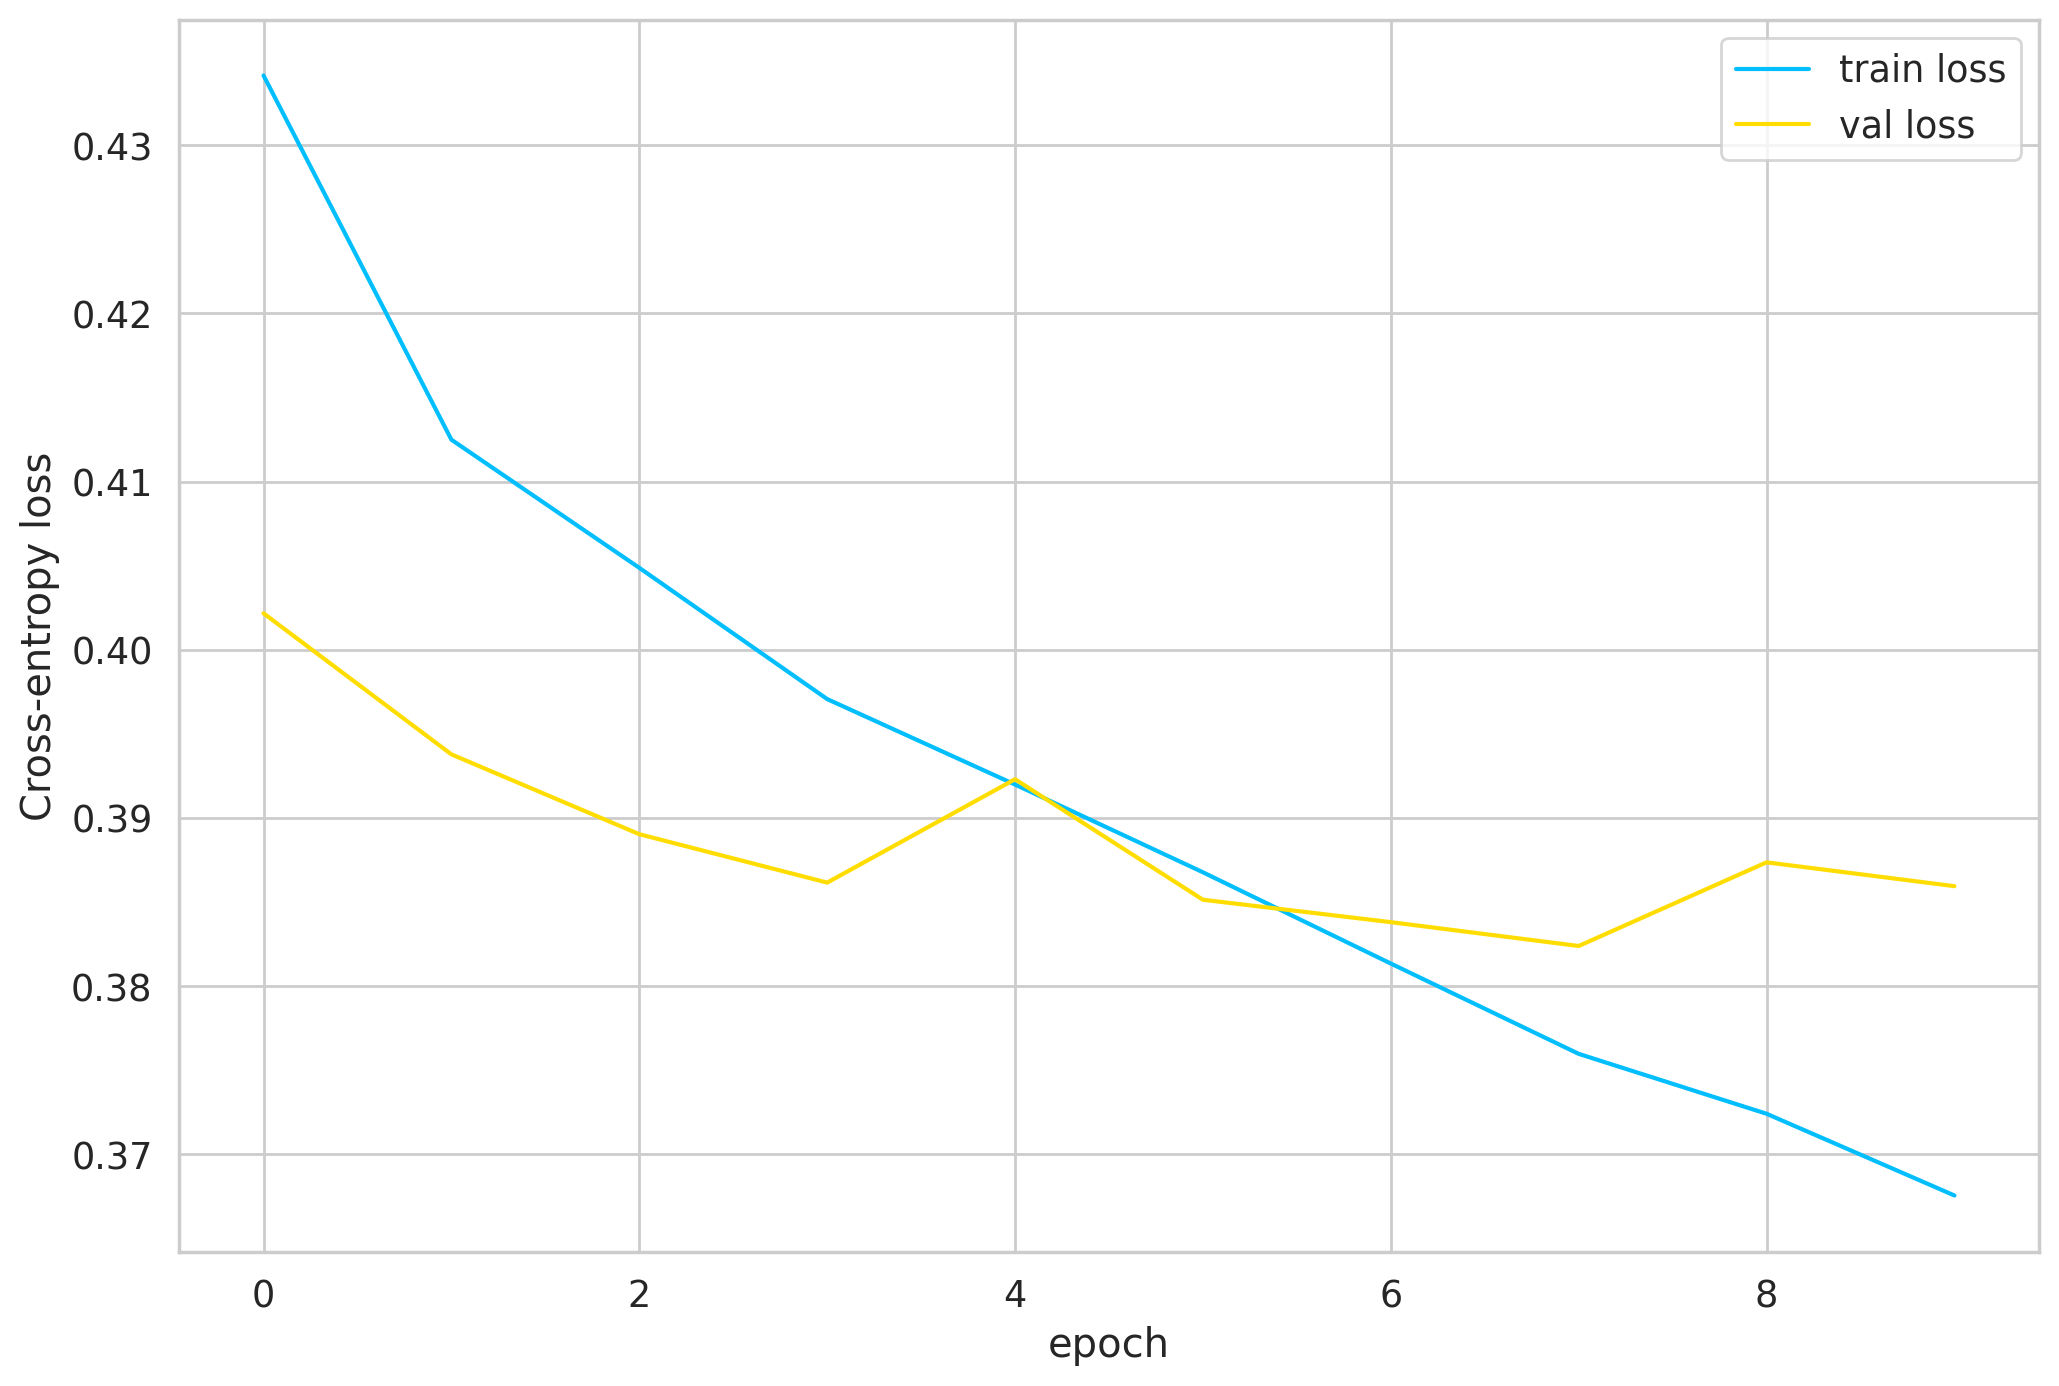

In [40]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

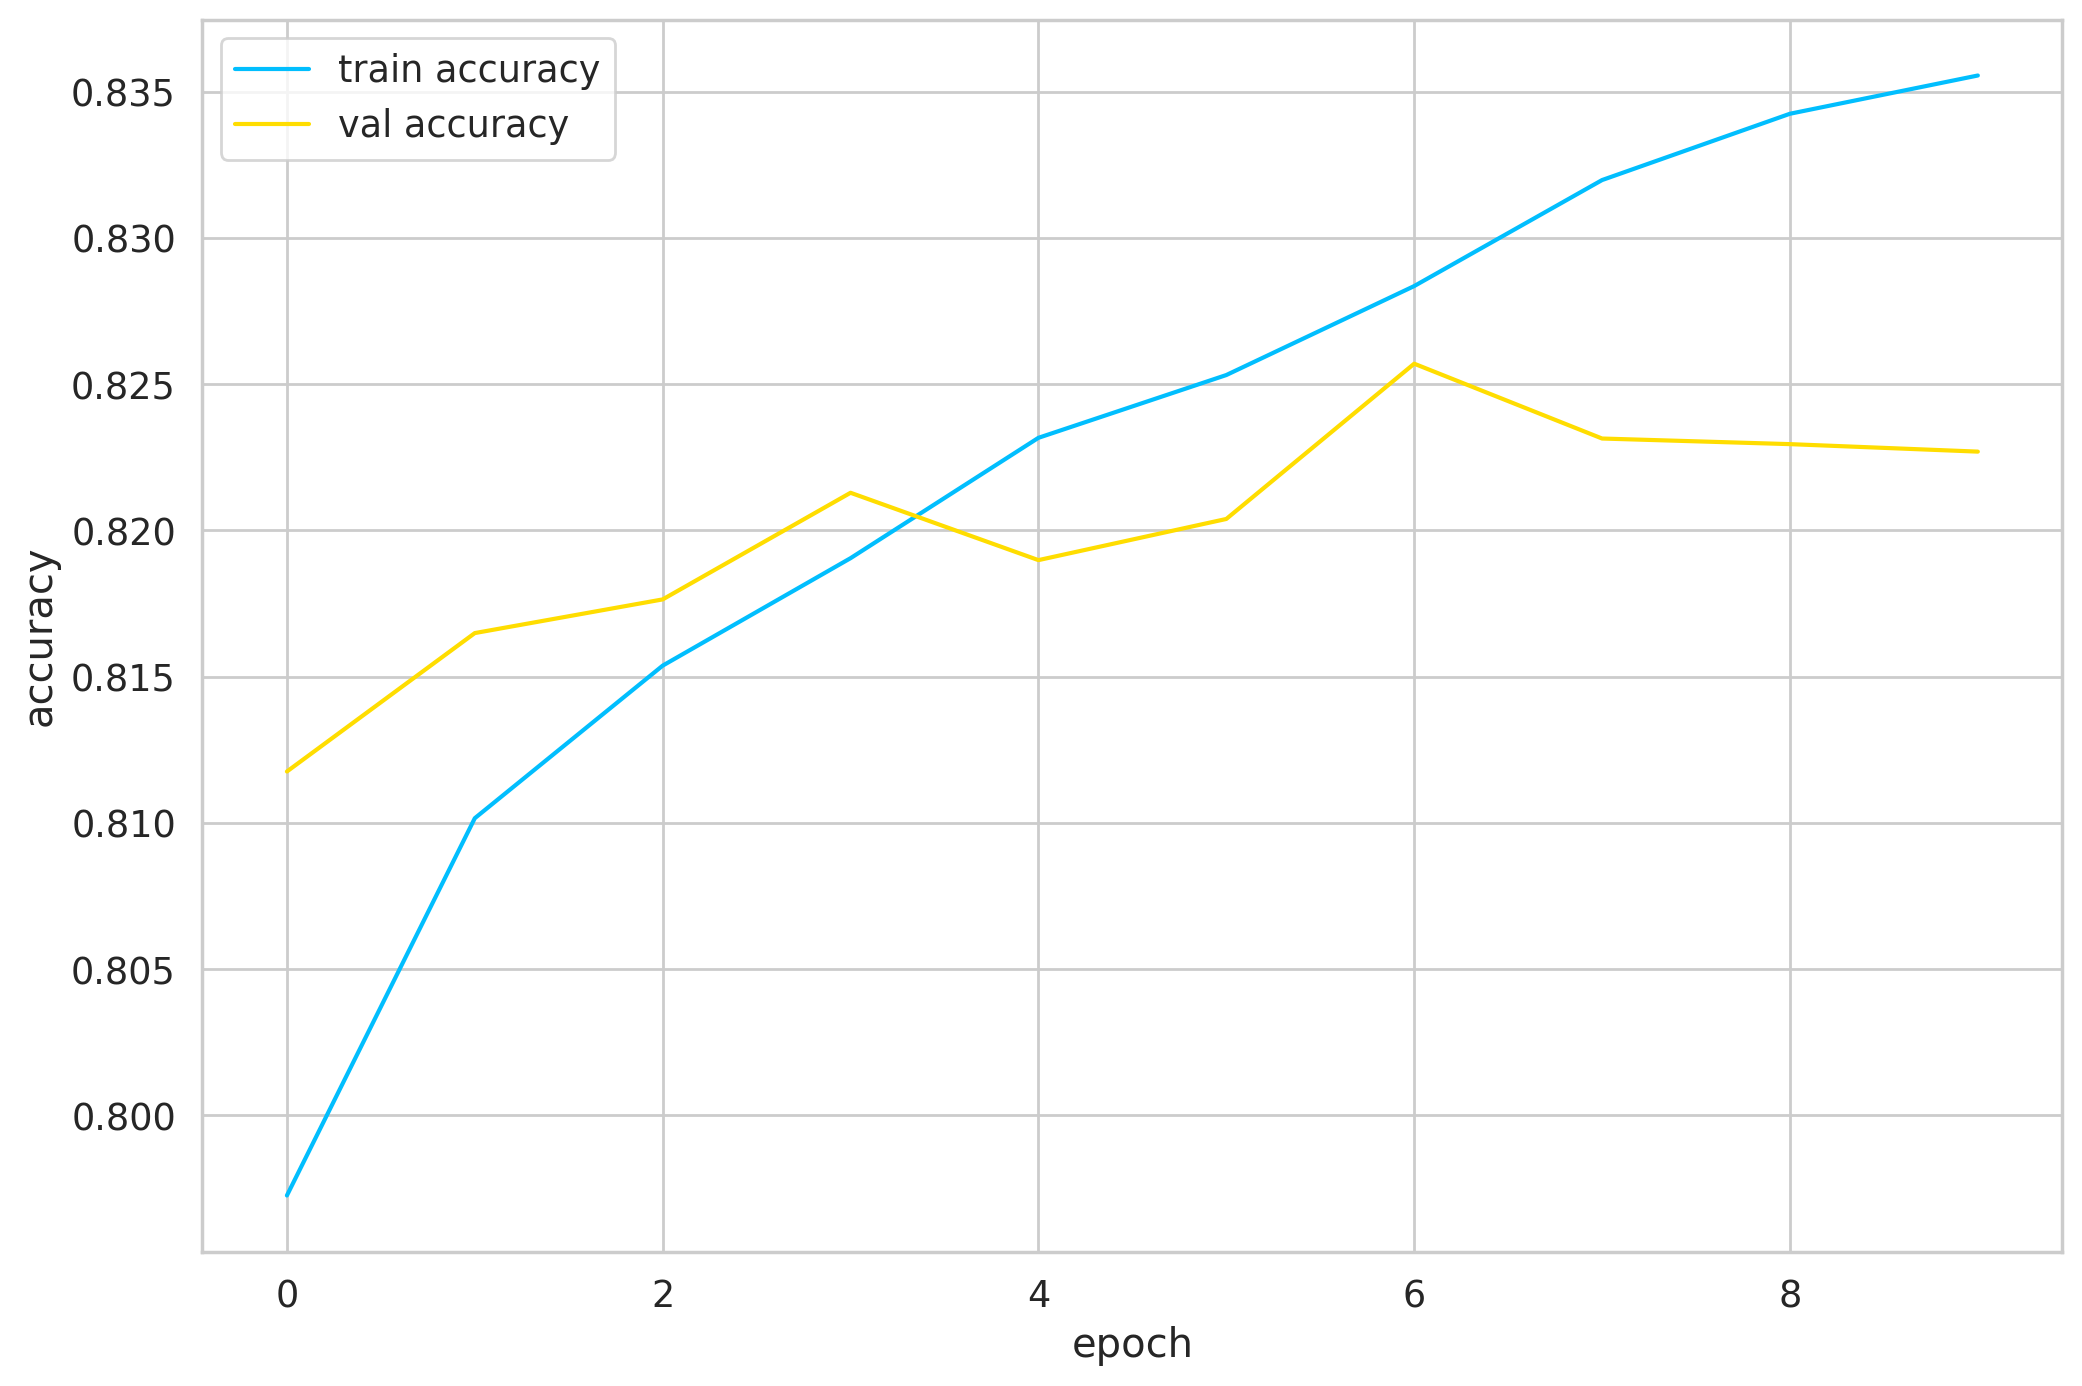

In [41]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [52]:
#Using model to predict

In [42]:
model.evaluate(X_test, y_test)

543/543 [==============================] - 4s 7ms/step - loss: 0.3976 - accuracy: 0.8178


[0.3976458013057709, 0.8177998065948486]

In [43]:
print(test_reviews.iloc[0])

 Asked for late checkout and didnt get an answer then got a yes but had to pay 25 euros by noon they called to say sorry you have to leave in 1h knowing that i had a sick dog and an appointment next to the hotel  Location staff 


In [44]:
print("Bad" if y_test[0][0] == 1 else "Good")

Bad


In [45]:
y_pred = model.predict(X_test[:1])
print(y_pred)

1/1 [==============================] - 0s 175ms/step
[[0.8601996  0.13980038]]


In [46]:
print(test_reviews.iloc[1])

 Don t really like modern hotels Had no character Bed was too hard  Good location rooftop pool new hotel nice balcony nice breakfast 


In [47]:
print("Bad" if y_test[1][0] == 1 else "Good")

Good


In [48]:
model.predict(X_test[1:2])

1/1 [==============================] - 0s 24ms/step


array([[0.38071436, 0.61928564]], dtype=float32)

In [49]:
print(test_reviews.iloc[2])

 we ordered food outside the front before we were leaving for the airport The waiter was excellent but the fish was both cold and under cooked no time to complain as we had to leave Location service wifi spar


In [50]:
print("Bad" if y_test[2][0] == 1 else "Good")

Good


In [51]:
model.predict(X_test[2:3])

1/1 [==============================] - 0s 22ms/step


array([[0.28974944, 0.7102506 ]], dtype=float32)